# Worksheet 06

Name:  Mariano Majano Amaya
UID: U56063451

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

In K means, the initial centroids are picked randomly. This affects the performance of K means and can lead to non-optimal convergence.  
However, in K means ++, although the initial centroids are picked randomly, it picks the next centroid with probability proportional to D(x)<sup>2</sup>, which leads to better performance.

b) What are some limitations of K means ++?

- Tends to favour clusters that have similar sizes
- Tends to favour clusters that are densely packed
- Does not work well with non-globular shapes

c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

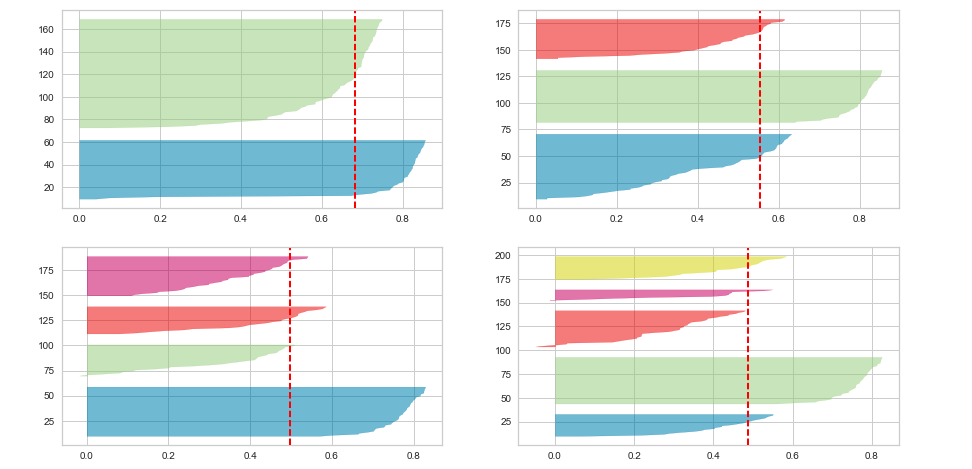

In [ ]:
from IPython.display import Image
Image(filename="silhouette.png", width=500, height=500)

I would choose K as 2 or 3, since the silhouette scores for the clusters in those cases are greater than the average silhouette scores in them. 

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 | $\sqrt{2}$ | 3 | 1 | $\sqrt{8}$ |
| B | $\sqrt{2}$ | 0 | $\sqrt{5}$ | 1 | $\sqrt{2}$ |
| C | 3 | $\sqrt{5}$ | 0 | $\sqrt{10}$  | $\sqrt{5}$  |
| D | 1 | 1  | $\sqrt{10}$ | 0 | $\sqrt{5}$ |
| E | $\sqrt{8}$ | $\sqrt{2}$ | $\sqrt{5}$ | $\sqrt{5}$ | 0 |

Step 2

|   | A & D  | B | C | E |
|---|---|---|---|---|
| A & D | 0 | 1 | 3 | $\sqrt{5}$ |
| B | 1 | 0 | $\sqrt{5}$ | $\sqrt{2}$ |
| C | 3 | $\sqrt{5}$  | 0 | $\sqrt{5}$ |
| E | $\sqrt{5}$ | $\sqrt{2}$ | $\sqrt{5}$ | 0 |

Step 3

|   | A & D & B | C  | E |
|---|---|---|---|
| A & D & B | 0 | $\sqrt{5}$ | $\sqrt{2}$ |
| C | $\sqrt{5}$ | 0 | $\sqrt{5}$ |
| E | $\sqrt{2}$ | $\sqrt{5}$ | 0 |

Step 4

|   | A & D & B & E  | C |
|---|---|---|
| A & D & B & E | 0 | $\sqrt{5}$ |
| C | $\sqrt{5}$ | 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 | $\sqrt{2}$ | 3 | 1 | $\sqrt{8}$ |
| B | $\sqrt{2}$ | 0 | $\sqrt{5}$ | 1 | $\sqrt{2}$ |
| C | 3 | $\sqrt{5}$ | 0 | $\sqrt{10}$  | $\sqrt{5}$  |
| D | 1 | 1  | $\sqrt{10}$ | 0 | $\sqrt{5}$ |
| E | $\sqrt{8}$ | $\sqrt{2}$ | $\sqrt{5}$ | $\sqrt{5}$ | 0 |

Step 2

|   | A&D  | B  | C  | E  |
|---|---|---|---|---|
|  A&D | 0 | $\sqrt{2}$  | $\sqrt{10}$  | $\sqrt{8}$  |
|  B |  $\sqrt{2}$ | 0 | $\sqrt{5}$  | $\sqrt{2}$  |
|  C | $\sqrt{10}$  | $\sqrt{5}$  | 0 | $\sqrt{5}$  |
|  E | $\sqrt{8}$  | $\sqrt{2}$  | $\sqrt{5}$  | 0 |

Step 3

|   | A&B&D  | C  | E  |
|---|---|---|---|
| A&B&D  | 0 | $\sqrt{10}$  | $\sqrt{8}$  |
| C  | $\sqrt{10}$  | 0 | 5  |
| E  | $\sqrt{8}$  | $\sqrt{5}$  | 0 |

Step 4

|   | A & D & B & E | C |
|---|---|---|
| A & D & B & E | 0 | $\sqrt{10}$ |
| C | $\sqrt{10}$ | 0 |

## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

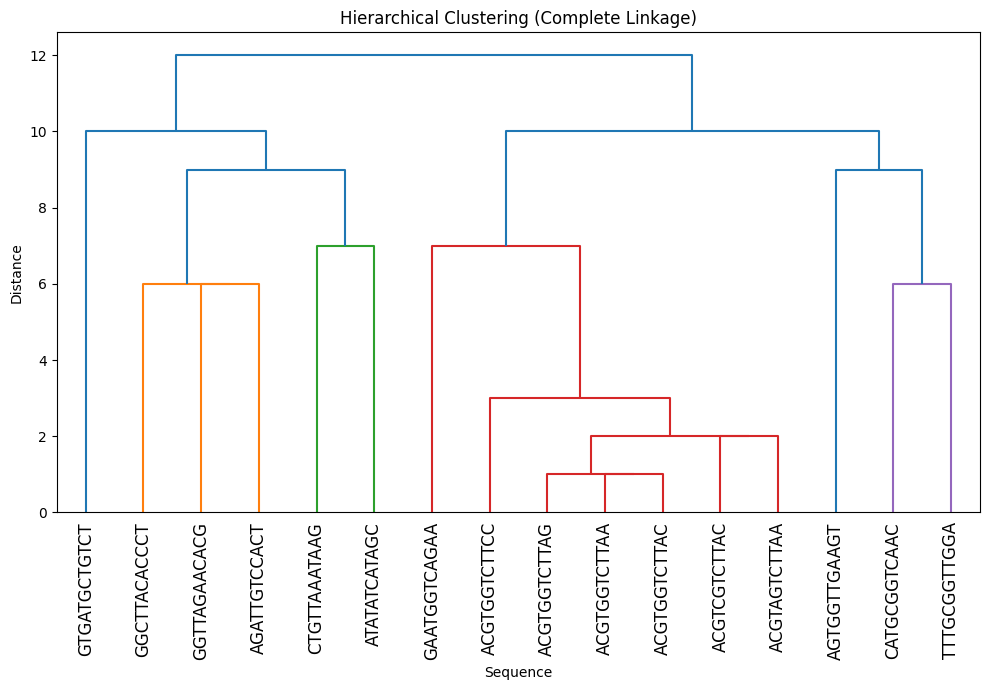

In [3]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

sequences = [
 'ACGTGGTCTTAA',
 'ACGTCGTCTTAC',
 'ACGTGGTCTTAC',
 'ACGTAGTCTTAA',
 'ACGTGGTCTTCC',
 'ACGTGGTCTTAG',
 'CTGTTAAATAAG',
 'GGTTAGAACACG',
 'AGTGGTTGAAGT',
 'GGCTTACACCCT',
 'AGATTGTCCACT',
 'CATGCGGTCAAC',
 'ATATATCATAGC',
 'TTTGCGGTTGGA',
 'GAATGGTCAGAA',
 'GTGATGCTGTCT']

def hamming_distance(s1, s2):
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))
def hamming_distance_matrix(sequences):
    n = len(sequences)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            distance_matrix[i, j] = hamming_distance(sequences[i], sequences[j])
            distance_matrix[j, i] = distance_matrix[i, j]
    return distance_matrix
dist_matrix = hamming_distance_matrix(sequences)
linked = linkage(squareform(dist_matrix), method='complete')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=sequences, orientation='top')
plt.xticks(rotation=90)  
plt.title('Hierarchical Clustering (Complete Linkage)')
plt.xlabel('Sequence')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()